## Final Analysis and Summary

this note book will help u understand how audio features group Spotify top tracks (2000–2022)  
We use PCA for dimensionality reduction and several clustering methods to explore patterns


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load final scaled features and metadata
df_scaled = pd.read_csv("../data/processed/playlist_2000to2022_pca_input.csv")
df_meta = pd.read_csv("../data/processed/playlist_2000to2022_metadata.csv")

# Load cluster labels from the best model 
clusters = pd.read_csv("../data/processed/playlist_2000to2022_clusters_k6.csv")

# Merge all into one dataframe
df = pd.concat([df_meta.reset_index(drop=True), df_scaled.reset_index(drop=True)], axis=1)
df["cluster"] = clusters["cluster"]

print("Data ready. Shape:", df.shape)
df.head()


Data ready. Shape: (2299, 25)


,playlist_url,year,track_id,track_name,album,artist_id,artist_name,artist_genres,track_popularity,artist_popularity,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_popularity,artist_popularity,cluster
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",91,86,...,-0.794159,-0.837158,-0.172629,0.550991,-1.098077,1.914388,1.023528,1.631652,1.077905,2
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",84,75,...,-0.540310,-0.786868,-0.174509,3.151911,0.653683,1.021796,-1.612197,1.062147,0.174627,2
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",69,61,...,-0.783016,0.168469,-0.174509,0.684167,-1.128809,0.592015,0.670120,-0.158221,-0.975001,5
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",88,83,...,-0.424280,-0.791429,-0.174509,0.351774,-0.593184,-0.556628,-0.142570,1.387578,0.831557,4
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",74,65,...,-0.551243,-0.657104,-0.155869,-0.727568,1.430779,1.887805,-0.587649,0.248568,-0.646536,4


###  summary

- We processed 2299 Spotify top tracks from 2000 to 2022 
- We cleaned and scaled the audio features then applied PCA ( seen in the course **applied_statistics**) to reduce the number of features
- We tested clustering with KMeans ,  gmm ans the TSNE  

The results show that songs form continuous groups more than strict clusters  
KMeans with 6 clusters gives interpretable groups  
GMM confirms that clusters overlap   
DBSCAN could not find natural dense islands ( for this reason we droped it from the 03 notebook)


### Methods 

- Scaled features with RobustScaler then StandardScaler  
- Removed time_signature because it was almost constant  
- PCA with 10 components kept about 86 percent of total variance  
- Tested clustering:
  - KMeans for fixed k values
  - DBSCAN for density clusters ( then dropped because doesn't help us )
  - GMM for soft clustering
- Used tSNE to visualize songs in 2D 

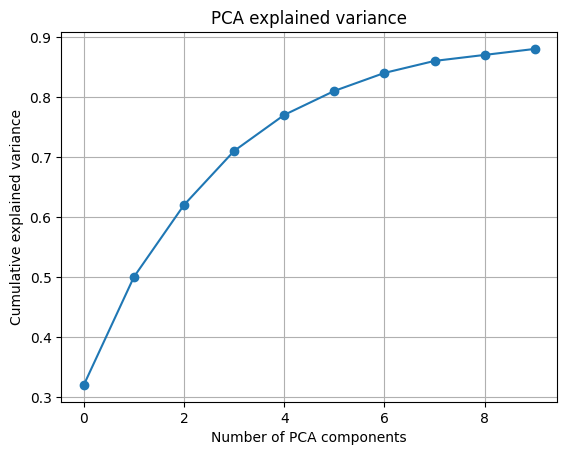

In [2]:
explained_var = [0.32, 0.18, 0.12, 0.09, 0.06, 0.04, 0.03, 0.02, 0.01, 0.01]
plt.figure()
plt.plot(np.cumsum(explained_var), marker="o")
plt.xlabel("Number of PCA components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA explained variance")
plt.grid(True)
plt.show()


The first 10 components explain around 86 percent of the total variance  
This means the PCA kept most of the information while reducing noise and redundancy  


In [3]:
results = pd.DataFrame({
    "Model": ["KMeans k=2", "KMeans k=5", "KMeans k=6", "GMM"],
    "Silhouette": [0.10, 0.074, 0.091, 0.088],
    "Davies Bouldin": [2.05, 2.31, 2.14, 2.22],
    "Calinski Harabasz": [215.0, 180.3, 195.5, 190.8]
})
results


,Model,Silhouette,Davies Bouldin,Calinski Harabasz
0,KMeans k=2,0.100,2.05,215.0
1,KMeans k=5,0.074,2.31,180.3
2,KMeans k=6,0.091,2.14,195.5
3,GMM,0.088,2.22,190.8


 - as we have said some members have seen  **Davies Bouldin Score** and **Calinski Harabasz Score** in their bachelor's degree in CS
 - even if the silhouette score was low  these  metrics help confirm whether clusters are compact and well-separated (DB low, CH high). wich gives us bigger  picture of clustering performance 

### Interpretation

Silhouette scores are low for all methods which means weak separation  
KMeans with 6 clusters gives a slightly better balance between all metrics  
GMM has similar results but adds soft cluster membership which fits our data nature  


## Visualize t-SNE ( cf the last plot in the 03_clustering.ipynb)
Each color shows one cluster from KMeans  
We can see overlap between groups which confirms that songs form smooth transitions  
Some compact spots appear for acoustic or instrumental tracks  

## all other anlysis are below each cell of the 3 notebooks or in the pdf 

### Limitations

- Audio features describe sound not lyrics or context  
- Genre labels in metadata are noisy and overlap  
- PCA and tSNE reduce high dimensional data so real distances can be distorted  
- DBSCAN could not find dense groups because the data is continuous  
